In [1]:
import sounddevice as sd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import scipy.io.wavfile as wav
from scipy.fftpack import fft, ifft, fftfreq
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = [16, 5]

In [2]:
def str2bits(str):
    res = bin(int.from_bytes(str.encode('ascii'), 'big'))[2:]
    return '0'*(8 - (len(res) % 8)) + res

In [3]:
from pam import SoundCommunication

In [4]:
msg = """
[ 7071.657145] CPU3: Core temperature above threshold, cpu clock throttled (total events = 88)
[ 7071.657156] CPU2: Core temperature above threshold, cpu cloc
"""

In [5]:
r = str2bits(msg)
# sync = ''.join(map(lambda x: str(int(x)), np.random.rand(100) > 0.5))
comm = SoundCommunication(44100, 200, 1000, 2000)

from testing import Tester
t = Tester(comm)
S = comm.send(r)

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(2)<module>()

ipdb> break comm.decode
Breakpoint 1 at /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py:72
ipdb> cont
> /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py(74)decode()
1    72     def decode(self, W, debug=False):
     73         #W = self.bandpass_filter(W, self.freqbot, self.freqtop)
---> 74         correlating_sync = self.send('')
     75         corr = self._correlate(W[:(self.symlen + self.synclen) * self.symsamp], correlating_sync)
     76         W *= np.sin(np.arange(W.size)/self.FS * 2 * np.pi * (self.freqtop + self.freqbot)/2)

ipdb> break 94
Breakpoint 2 at /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py:94
ipdb> cont
> /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py(94)decode()
     92                 eye_corr = np.correlate(eye_win, self.shaping)
     93                 plt.plot(eye_corr)
2--> 94             win_corr = np.correlate(win, s

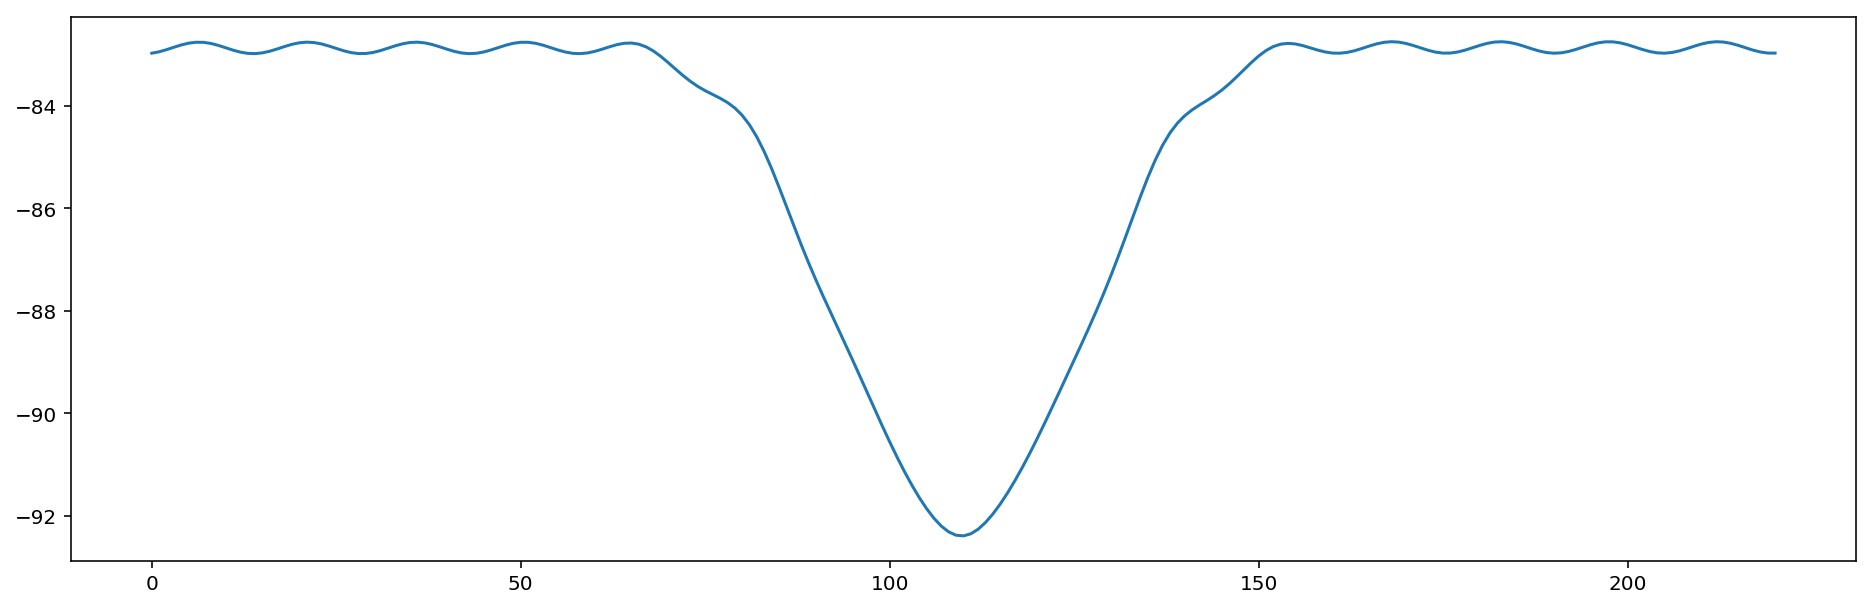

ipdb> cont
> /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py(94)decode()
     92                 eye_corr = np.correlate(eye_win, self.shaping)
     93                 plt.plot(eye_corr)
2--> 94             win_corr = np.correlate(win, self.shaping)
     95             max_idx = np.argmax(np.abs(win_corr))
     96 

ipdb> plt.show()


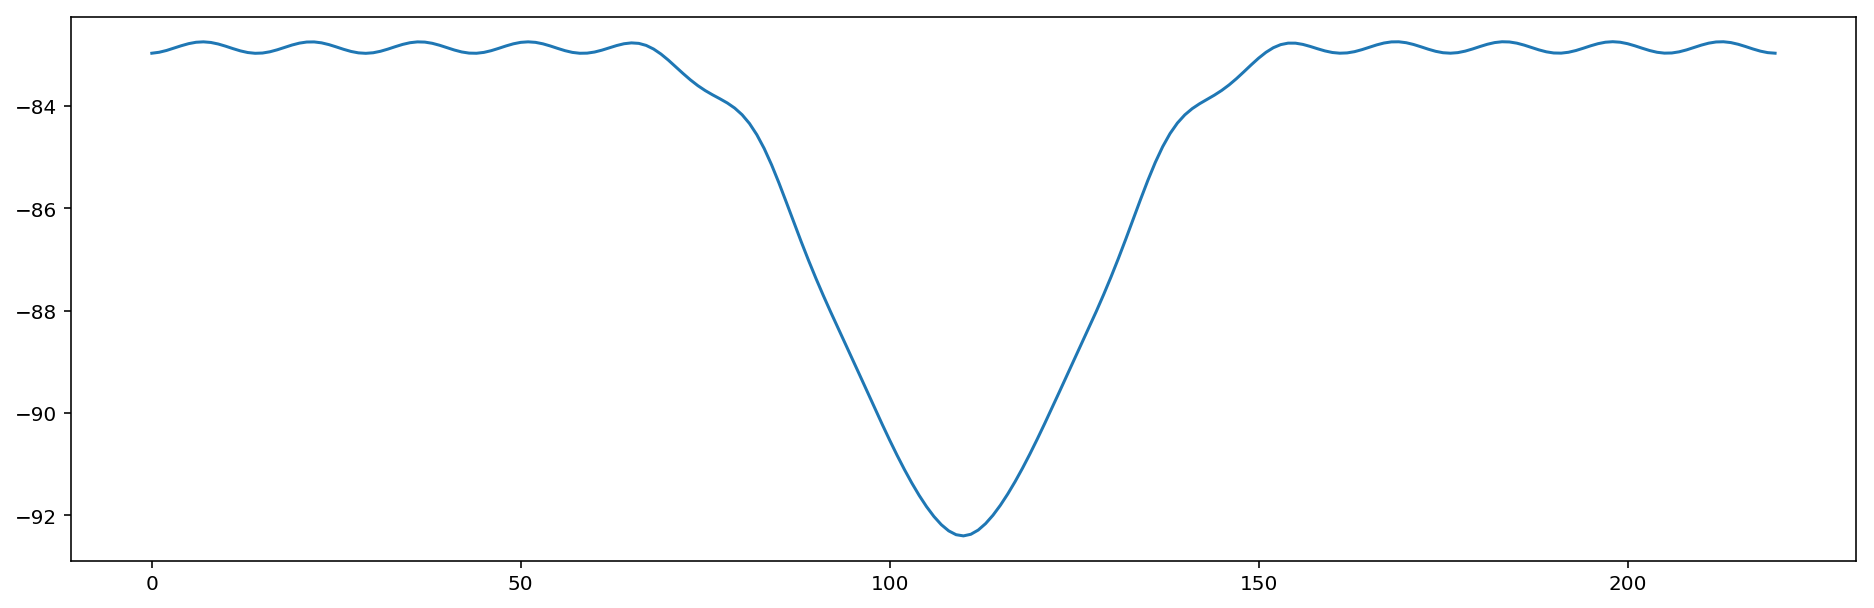

ipdb> cont
> /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py(94)decode()
     92                 eye_corr = np.correlate(eye_win, self.shaping)
     93                 plt.plot(eye_corr)
2--> 94             win_corr = np.correlate(win, self.shaping)
     95             max_idx = np.argmax(np.abs(win_corr))
     96 

ipdb> plt.plot()
[]
ipdb> plt.show()


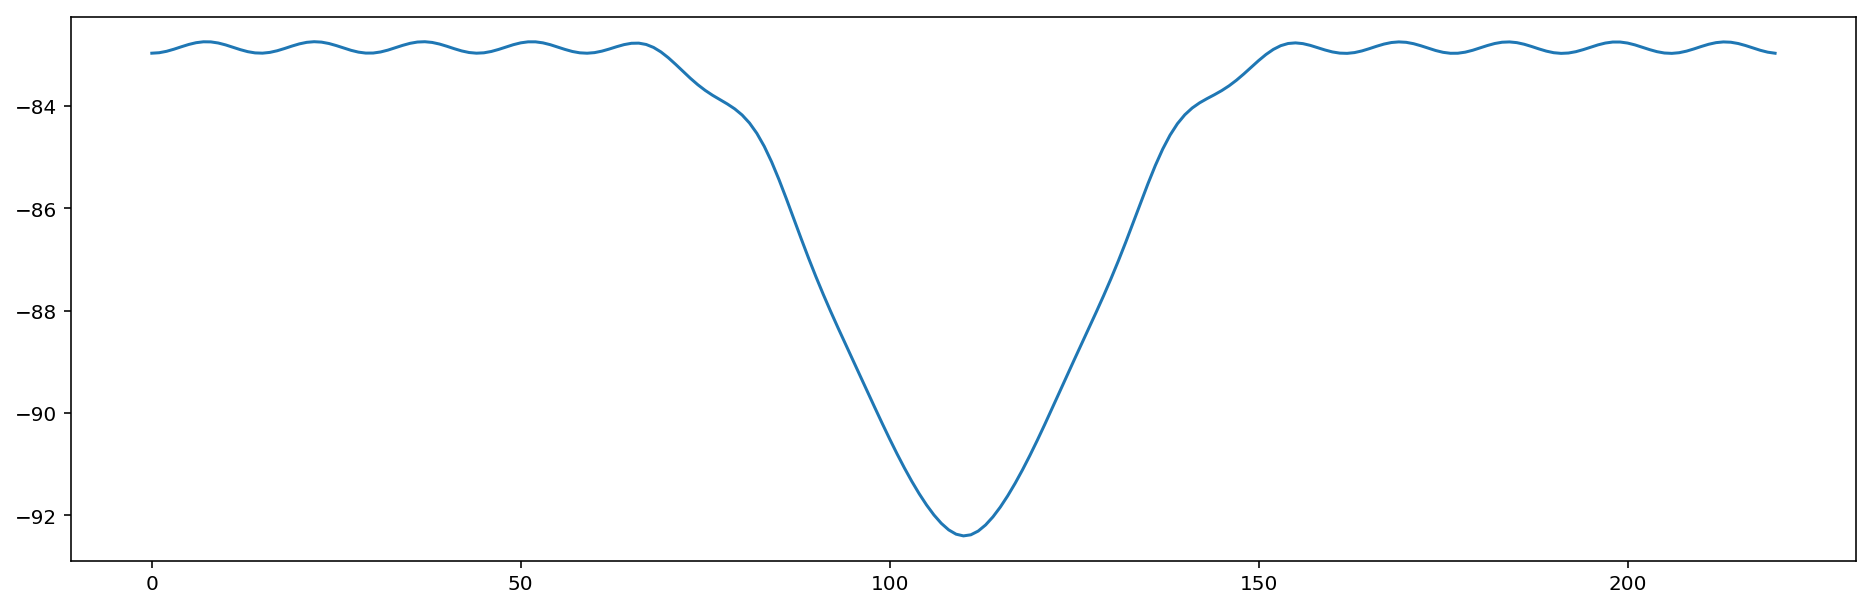

ipdb> cont
> /home/pietro/Documents/epfl/bachelor6/PDC/over_the_air/pam.py(94)decode()
     92                 eye_corr = np.correlate(eye_win, self.shaping)
     93                 plt.plot(eye_corr)
2--> 94             win_corr = np.correlate(win, self.shaping)
     95             max_idx = np.argmax(np.abs(win_corr))
     96 

ipdb> plt.show()


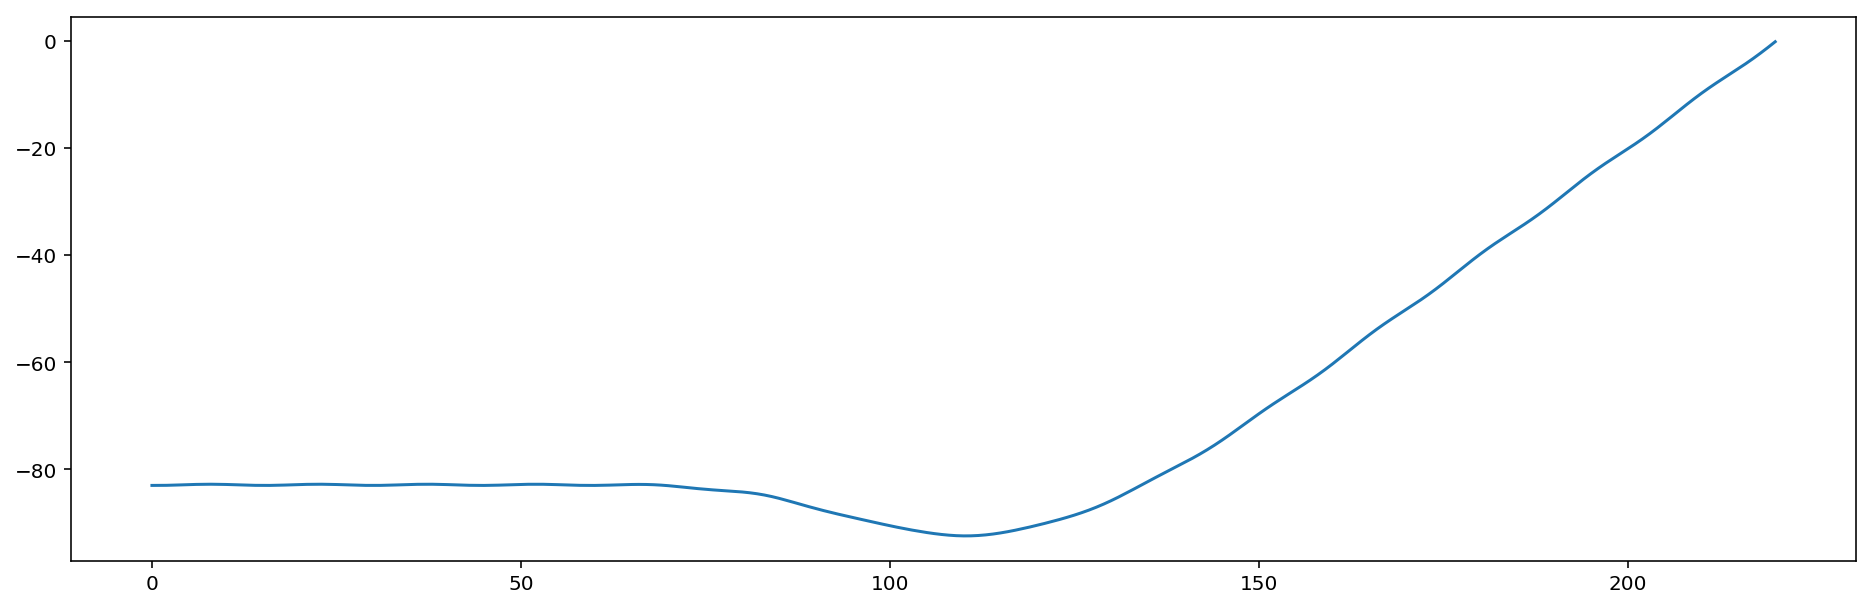

In [ ]:
%%debug
wr = comm.decode(t.pad(S), debug=True)

In [6]:
# sd.play(t.pad(S), comm.FS)

In [7]:
# sd.stop()

In [8]:
_, W = wav.read('w.wav')

In [9]:
# wav.write('w.wav', data=W, rate=comm.FS)

In [10]:
# W = sd.rec(int(10 * comm.FS), channels=1, samplerate=comm.FS, blocking=True).ravel()

In [20]:
t.diff(wr[:len(r)], r)

('000010100XX110110010X0X0001101110X1100X0001101110X1100010010X110001101100X1101010X11011100110X01001101000X1101010101X101001X000001000XX101010X0X010101010XX100110011X010001000000100001101101111X1110010011001010XX000X0011X010X011001010110110101110X0X0110010101X10X100110000101X1010X0111010101110X10011001010XXX00000110000101100X1001101111011101100110010X0XX00000011X010X01101000X11100X00110010101X10011011010000110X11101101100011001000X1011000010000001100X1101110X0X011X01010X1X00000110001101101100011011110110001101101011001000X0011X010X01101000X11100100110111X0111010001X10100011011000110010101X001000X1000000X101000X111010X0110111XX111010001X000010110X1000X10000001100101011101100110010101X0X110011X010001X10011001000000011X1010X1X0000001X1000001110000010100X00XX10100XX110110010X0X000110X110X1100X0001101110X1100010010X110001101100X1101010X11011100110X01001101010X11011001011101001X000001000XX101010X0X010101010XX1001000111010001000000100001101101111X1110010011001010XX000X00111010X01100101011011

In [ ]:
W = sd.playrec(t.pad(S), channels=1, samplerate=comm.FS).ravel()